## 1. Natural Language Toolkit
 - 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지
 - 말뭉치, 토큰 생성, 형태소 분석, 품사 태깅 기능 제공

In [10]:
import nltk

## 2. 말뭉치 다운로드
 - 분석에 필요한 말뭉치 다운로드
 - $HOME/nltk_download 

In [11]:
nltk.download('book', quiet=True) # 전체 코퍼스 다운로드
nltk.download('omw-1.4') # nltk's wordnet directory structure

True

In [12]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


- 저작권이 말소된 문학작품을 포함하는 gutenberg 말뭉치 샘플

In [13]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [14]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

## 3. 토큰(Token) 생성
- 자연어 문서를 분석하기 위해, 우선 긴 문자열을 분석을 하기 위한 작은 단위(Token)로 나눈다. 이 작업을 토큰 생성(Tokenizing)이라고 한다.
- 영문의 경우에는 문장, 단어 등을 토큰으로 사용하거나 정규 표현식을 쓸 수 있다.

In [16]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [17]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [18]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer('[\w]+')
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

## 4. 형태소 분석
- 형태소 분석(Morphological analysis)이란 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고, 이를 이용하여 형태소를 찾아내거나 처리하는 작업
- 어간 추출(stemming), 원형 복원(lemmatizing), 품사 부착(Part-Of-Speech Tagging)

### 4.1 어간 추출과 원형 복원
- 어간 추출(Stemming): 변화된 단어의 접미사나 어미를 제거하여 같은 의미를 가지는 형태소의 기본형을 찾는 방법
- 어간 추출법은 단순히 어미를 제거할 뿐이므로 단어의 원형을 정확히 찾아주지는 않는다.

In [19]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

print('Porter Stemmer : ', [st1.stem(w) for w in words])
print('Lancaster Stemmer : ', [st2.stem(w) for w in words])

Porter Stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


- 원형복원(Lemmatizing): 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업
- 품사(Part of speech)를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있다.

In [35]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w, pos = 'v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

## 5. 품사 부착
- 품사(POS, Part-Of-Speech)는 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것으로 언어에 따라 학자에 따라 다르다.
- Penn Treebank Tagset
-- NNP: 고유명사, VB: 동사, VBP: 동사 현재형, TO: to 전치사, NN: 명사(단수형 혹은 집합형), DT: 관형사

In [36]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [37]:
from nltk.tag import pos_tag
sentence = 'Emma refused to permit us to obtain the refuse permit'
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

- 품사 태그 정보를 사용하면 명사인 토크만 선택 가능

In [38]:
nouns_list = [t[0] for t in tagged_list if t[1] == 'NN']
nouns_list

['refuse', 'permit']

- untag 명령을 사용하면 태그 튜플을 제거가능

In [39]:
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [40]:
def tokenizer(doc):
    return ['/'.join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

## 6. Text 클래스
- NLTK의 Text 클래스는 문서 분석에 유용한 여러가지 메서드를 제공한다.

In [44]:
from nltk import Text
import matplotlib.pyplot as plt
text = Text(retokenize.tokenize(emma_raw))

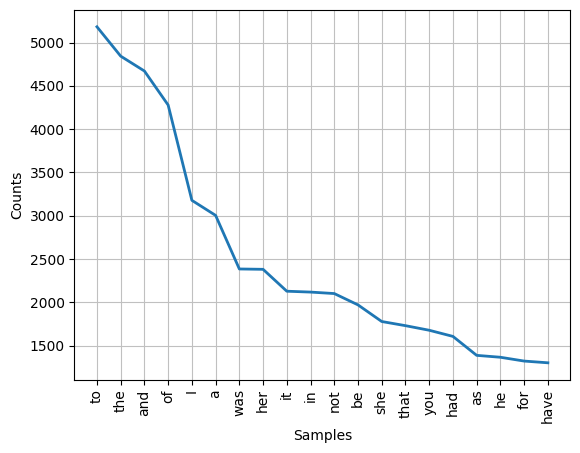

In [45]:
text.plot(20)
plt.show()

- dispersion_plot 메서드는 단어가 사용된 위치를 시각화한다.
- 소설 엠마의 각 등장인물에 대해 적용하면 다음과 같은 결과를 얻는다.

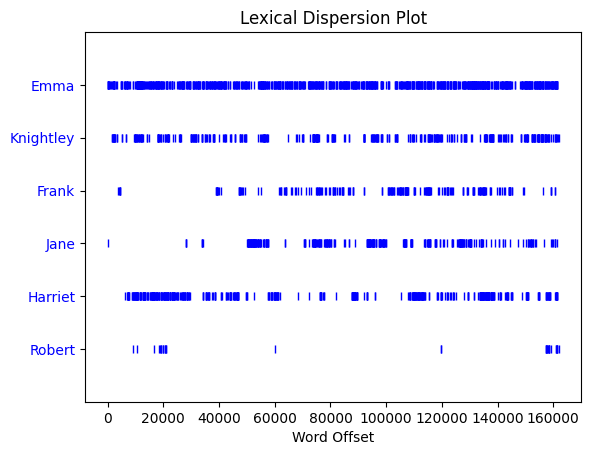

In [46]:
text.dispersion_plot(['Emma', 'Knightley', 'Frank', 'Jane', 'Harriet', 'Robert'])

- concordance 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다. 

In [47]:
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

- similar 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어를 찾는다.

In [48]:
text.similar('Emma')

she it he i harriet you her jane him that me and all they them herself
there but be isabella


- 두 단어의 공통 문맥을 보려면 common_contexts 메서드를 사용한다.

In [49]:
text.common_contexts(['Emma', 'she'])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


## 7. FreqDist
- FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다. Text 클래스의 vocab 메서드로 추출할 수 있다.

In [50]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

- 또는 다음처럼 토큰 리스트를 넣어서 직접 만들 수도 있다. Emma 말뭉치에서 사람의 이름만 모아서 FreqDist 클래스 객체를 만들고, NNP(고유명사)이면서 필요없는 단어(stop words)는 제거하였다.

In [52]:
from nltk import FreqDist

stopwords = ['Mr.', 'Mrs.', 'Miss', 'Mr', 'Mrs', 'Dear']
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))

names_list = [t[0] for t in emma_tokens if t[1] == 'NNP' and t[0] not in stopwords]

fd_names = FreqDist(names_list)

- 전체 단어의 빈도 수, 'Emma' 의 빈도 수, 'Emma' 의 전체 출현 확률

In [53]:
fd_names.N(), fd_names['Emma'], fd_names.freq('Emma')

(7863, 830, 0.10555767518758744)

- most_common 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

In [54]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

## 8. Word Cloud
- 문서에 출현한 단어의 시각화

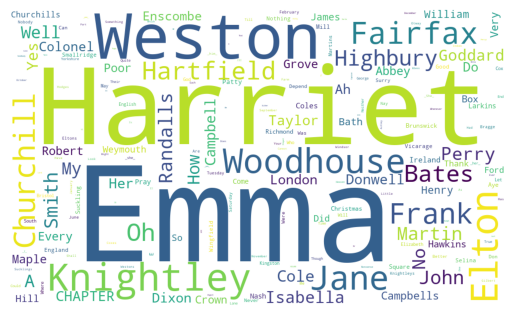

In [57]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height= 600, background_color='white', random_state = 0)
plt.imshow(wc.generate_from_frequencies(fd_names))

plt.axis('off')
plt.show()